In [358]:
!pip install ucimlrepo

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 

#создаем датафрейм в удобном для нас формате pandas
df = pd.DataFrame(data=credit_approval.data.features, columns=credit_approval.variables.name)
#столбец A16 - таргет ("выдан займ или нет")
df['A16'] = y
#выведем пять первых строк нашего датафрейма, чтобы примерно понимать, как выглядят наши данные

print(df.head())

name A16  A15    A14 A13 A12  A11 A10 A9    A8 A7 A6 A5 A4     A3     A2 A1
0      +    0  202.0   g   f    1   t  t  1.25  v  w  g  u  0.000  30.83  b
1      +  560   43.0   g   f    6   t  t  3.04  h  q  g  u  4.460  58.67  a
2      +  824  280.0   g   f    0   f  t  1.50  h  q  g  u  0.500  24.50  a
3      +    3  100.0   g   t    5   t  t  3.75  v  w  g  u  1.540  27.83  b
4      +    0  120.0   s   f    0   f  t  1.71  v  w  g  u  5.625  20.17  b
0     A16
1     A15
2     A14
3     A13
4     A12
5     A11
6     A10
7      A9
8      A8
9      A7
10     A6
11     A5
12     A4
13     A3
14     A2
15     A1
Name: name, dtype: object


In [360]:
# variable information 
print(credit_approval.variables) 
# Заметим, что категориальные переменные по определению могут принимать только ограниченное и обычно фиксированное количество возможных значений. Это свойство понадобится нам 
# при заполнении пропусков
# Так же категориальные переменные в данном датафрейме принимают только буквенные значения
# для удобства разделим переменные на категориальные и непрерывные
continuous = credit_approval.variables[credit_approval.variables['type']=='Continuous']
categorical = credit_approval.variables[credit_approval.variables['type']=='Categorical']

   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [361]:
continuous

,name,role,type,demographic,description,units,missing_values
1,A15,Feature,Continuous,None,None,None,no
2,A14,Feature,Continuous,None,None,None,yes
5,A11,Feature,Continuous,None,None,None,no
8,A8,Feature,Continuous,None,None,None,no
13,A3,Feature,Continuous,None,None,None,no
14,A2,Feature,Continuous,None,None,None,yes


In [362]:
categorical

,name,role,type,demographic,description,units,missing_values
0,A16,Target,Categorical,None,None,None,no
3,A13,Feature,Categorical,None,None,None,no
4,A12,Feature,Categorical,None,None,None,no
6,A10,Feature,Categorical,None,None,None,no
7,A9,Feature,Categorical,None,None,None,no
9,A7,Feature,Categorical,None,None,None,yes
10,A6,Feature,Categorical,None,None,None,yes
11,A5,Feature,Categorical,None,None,None,yes
12,A4,Feature,Categorical,None,None,None,yes
15,A1,Feature,Categorical,None,None,None,yes


In [363]:
df_w_cont = pd.DataFrame()
df_w_cat = pd.DataFrame()

In [364]:
# Заполним пропуски, а так же проиллюстрируем их заполнение:
# для начала в таблицу started_blanks запишем количество пропусков в каждом столбце
started_blanks = df.isna().sum()
# непосредственно заполним пропуска
for name in credit_approval.variables.name:
    if (df[name].isna().sum()!=0):
        if ((df[name].dtype == int) or (df[name].dtype == float)): # если в столбце не строки, а числа, то заполним средним значением (если переменные непрерывные)
            df_w_cont[name] = df[name]
            fill_value = df[name].mean()
            df[name].fillna(fill_value, inplace=True)
        else:
            df_w_cat[name] = df[name]
            # если переменная категориальная, то по свойству, описанному выше, кажется логичным заполнить пропуски самым популярным значением в столбце
            counted_values = df[name].value_counts()
            most_common =counted_values.idxmax()
            df[name].fillna(most_common, inplace=True)
# создадим еще одну таблицу с количеством пропусков, но уже в заполненном датафрейме
finished_blanks = df.isna().sum()

print("До заполнения")
print(started_blanks)
print("")
print("После заполнения")
print(finished_blanks)

До заполнения
name
A16     0
A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
dtype: int64

После заполнения
name
A16    0
A15    0
A14    0
A13    0
A12    0
A11    0
A10    0
A9     0
A8     0
A7     0
A6     0
A5     0
A4     0
A3     0
A2     0
A1     0
dtype: int64


In [365]:
print(df_w_cont.head())
print(df_w_cat) 

     A14     A2
0  202.0  30.83
1   43.0  58.67
2  280.0  24.50
3  100.0  27.83
4  120.0  20.17
     A7  A6 A5 A4 A1
0     v   w  g  u  b
1     h   q  g  u  a
2     h   q  g  u  a
3     v   w  g  u  b
4     v   w  g  u  b
..   ..  .. .. .. ..
685   h   e  p  y  b
686   v   c  g  u  a
687  ff  ff  p  y  a
688   v  aa  g  u  b
689   h   c  g  u  b

[690 rows x 5 columns]


Теперь изучим распределение переменных в столбцах, где каждый элемент - числовое значение. Иными словами, рассмотрим распределение непрерывных переменных:

Для начала выведем основную информацию о столбцах с непрерывными переменными

In [366]:
df.describe()
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.

name,A15,A14,A11,A8,A3,A2
count,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,1017.385507,184.014771,2.40000,2.223406,4.758725,31.568171
std,5210.102598,172.159274,4.86294,3.346513,4.978163,11.853273
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000
25%,0.000000,80.000000,0.00000,0.165000,1.000000,22.670000
50%,5.000000,160.000000,0.00000,1.000000,2.750000,28.625000
75%,395.500000,272.000000,3.00000,2.625000,7.207500,37.707500
max,100000.000000,2000.000000,67.00000,28.500000,28.000000,80.250000


In [379]:

updatemenu = [dict()]
buttons = []
fig = go.Figure()
for i in continuous.name:
    fig.add_trace(px.histogram(df, x=i).data[0])

for i, col in enumerate(continuous.name):

    visibles = [False] * len(continuous.name)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

fig.update_layout(showlegend=True, updatemenus=updatemenu)
fig.update_layout(
     title={
        "text": "Распределение непрерывных переменных",
        "x": 0.5
    },
    xaxis_title="Диапазон",
    yaxis_title="Количество значений"
)
fig.show()

Теперь рассмотрим распределение категориальных переменных

In [368]:
updatemenu = [dict()]
buttons = []
fig2 = go.Figure()

for i in categorical.name:
    fig2.add_trace(px.histogram(df, x=i).data[0])

for i, col in enumerate(categorical.name):

    visibles = [False] * len(categorical.name)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

fig2.update_layout(showlegend=True, updatemenus=updatemenu)
fig2.update_layout(
     title={
        "text": "Распределение категориальных переменных",
        "x": 0.5
    },
    xaxis_title="Значение",
    yaxis_title="Количество значений"
)
fig2.show()



Также необходимо посмотреть на корреляцию непрерывных переменных

In [369]:
df.corr()

name,A15,A14,A11,A8,A3,A2
name,,,,,,
A15,1.000000,0.065609,0.063692,0.051345,0.123121,0.018539
A14,0.065609,1.000000,-0.119809,-0.076389,-0.222346,-0.077161
A11,0.063692,-0.119809,1.000000,0.322330,0.271207,0.185575
A8,0.051345,-0.076389,0.322330,1.000000,0.298902,0.392787
A3,0.123121,-0.222346,0.271207,0.298902,1.000000,0.201316
A2,0.018539,-0.077161,0.185575,0.392787,0.201316,1.000000


In [370]:
fig_cor = px.imshow(df.corr(), text_auto=True)
fig_cor.update_layout(
     title={
        "text": "Корреляция непрерывных переменных",
        "x": 0.5
    },

)
fig_cor.show()

Отсюда можем видеть, что A15 слабо коррелирует со всеми прочими признаками, а значит позже имеет смысл рассмотреть его подробнее.

Теперь поработаем с категориальными признаками. 

Очевидно, работать с некоторым дискретным набором строковых значений неудобно для анализа, поиска зависимостей и построения гипотез. В этом случае нас выручит метод создания фиктивных переменных. Он заключается в том, что мы, жертвуя компактностью в представлении датафрейма, по определённой логике заменяем признаки так, чтобы в значениях переменных хранить булевые значения.

Например, если у нас были признаки A1, A2, что содержали наборы значений из словаря {"a", "b", "c"}:

$$\begin{array}{cc}
A1 & A2 \\
a & b \\
c & a \\
b & c \\
a & b \\
\end{array}$$

то в измененном датафрейме при создании фиктивных переменных мы получим признаки $A1_a$, $A1_b$, $A1_c$, $A2_a$, $A2_b$, $A2_c$

$$\begin{array}{ccccccc}
 & A1_a & A1_b & A1_c & A2_a & A2_b & A2_c \\
0 & 1 & 0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 1 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 & 0 & 0 & 1 \\
3 & 1 & 0 & 0 & 0 & 1 & 0 \\
\end{array}$$

Возьмём признаки из списка "categorical":

In [371]:
categorical

,name,role,type,demographic,description,units,missing_values
0,A16,Target,Categorical,None,None,None,no
3,A13,Feature,Categorical,None,None,None,no
4,A12,Feature,Categorical,None,None,None,no
6,A10,Feature,Categorical,None,None,None,no
7,A9,Feature,Categorical,None,None,None,no
9,A7,Feature,Categorical,None,None,None,yes
10,A6,Feature,Categorical,None,None,None,yes
11,A5,Feature,Categorical,None,None,None,yes
12,A4,Feature,Categorical,None,None,None,yes
15,A1,Feature,Categorical,None,None,None,yes


In [374]:
cat_w_dummies = pd.get_dummies(df[categorical.name], columns=['A16', 'A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'])#.drop(columns = ["A16_+", "A16_-"], axis=1, inplace=True)

# исключаем из рассмотрения, поскольку A16 - целевой признак
cat_w_dummies.drop(columns = ["A16_+", "A16_-"], axis=1, inplace=True)

# убедимся, что в нём нет пропущенных значений

if (cat_w_dummies.isna().sum().sum() == 0):
    print("Пропусков нет")

cat_w_dummies


Пропусков нет


,A13_g,A13_p,A13_s,A12_f,A12_t,A10_f,A10_t,A9_f,A9_t,A7_bb,...,A6_w,A6_x,A5_g,A5_gg,A5_p,A4_l,A4_u,A4_y,A1_a,A1_b
0,1,0,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
4,0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
686,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
687,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
688,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


Проведём небольшой EDA с фиктивными переменными. Для начала, исследуем корреляцию:

In [375]:
# print(cat_w_dummies.corr())

fig_cor = px.imshow(cat_w_dummies.corr(), text_auto=True)
fig_cor.update_layout(
     title={
        "text": "Корреляция фиктивных переменных, представляющих категориальные",
        "x": 0.5
    },

)
fig_cor.show()


In [376]:
cat_w_dummies.describe()

,A13_g,A13_p,A13_s,A12_f,A12_t,A10_f,A10_t,A9_f,A9_t,A7_bb,...,A6_w,A6_x,A5_g,A5_gg,A5_p,A4_l,A4_u,A4_y,A1_a,A1_b
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.905797,0.011594,0.082609,0.542029,0.457971,0.572464,0.427536,0.476812,0.523188,0.085507,...,0.092754,0.055072,0.760870,0.002899,0.236232,0.002899,0.760870,0.236232,0.304348,0.695652
std,0.292323,0.107128,0.275490,0.498592,0.498592,0.495080,0.495080,0.499824,0.499824,0.279838,...,0.290297,0.228287,0.426862,0.053799,0.425074,0.053799,0.426862,0.425074,0.460464,0.460464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# выводы о мультиколлинеарности считать надо аккуратно, поскольку очевидно AI_j_1,.., AI_j_k линейно независимы по среднему значению для всякого набора

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = cat_w_dummies.columns
vif["VIF"] = [variance_inflation_factor(cat_w_dummies.values, i) for i in range(cat_w_dummies.shape[1])]

print(vif)

# но оно будет иметь смысл, если мы исключим фиктивные переменные, относящиеся к одному категориальному признаку

   Feature           VIF
0    A16_+  3.371695e+03
1    A16_-           inf
2    A13_g  8.332897e+02
3    A13_p           inf
4    A13_s           inf
5    A12_f  1.847998e+03
6    A12_t  3.434052e+05
7    A10_f  4.779989e+04
8    A10_t  8.600882e+04
9     A9_f  9.520238e+04
10    A9_t  1.441276e+05
11   A7_bb  4.041184e+07
12   A7_dd  1.064999e+08
13   A7_ff  7.962678e+06
14    A7_h  5.483916e+04
15    A7_j  2.026744e+08
16    A7_n  1.259052e+06
17    A7_o  1.781270e+09
18    A7_v  4.452434e+04
19    A7_z  3.210703e+08
20   A6_aa  1.977317e+08
21    A6_c  3.032227e+07
22   A6_cc  1.026529e+07
23    A6_d  6.661197e+07
24    A6_e  6.272296e+07
25   A6_ff  5.157328e+06
26    A6_i  1.169263e+07
27    A6_j  7.411650e+08
28    A6_k  3.200525e+07
29    A6_m  1.284701e+05
30    A6_q  3.485354e+05
31    A6_r  1.724507e+06
32    A6_w  2.177892e+05
33    A6_x  1.303679e+07
34    A5_g  4.298201e+04
35   A5_gg  1.048471e+09
36    A5_p  1.320527e+06
37    A4_l  7.945804e+08
38    A4_u  1.471660e+04


/Users/artemshevchenko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



Теперь создадим новый, более удоный датафрейм для будущего анализа с использованием моделей машинного обучения:

In [ ]:
x_for_learning = pd.DataFrame()

# собираю в отдельный датафрейм все непрерывные признаки
for name in continuous.name:
    x_for_learning[name] = df[name]
        

# в него же кладу фиктивные переменные для категориальных признаков исходного датасета
for dummy in cat_w_dummies.columns:
    if (dummy != "A16_+" and dummy != "A16_-"):
        x_for_learning[dummy] = cat_w_dummies[dummy]

# меняю "+" и "-" в таргете на соответствующие булевы значения
y_for_learning = y.replace({"+": 1, "-": 0})

In [ ]:
# разделяю выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(x_for_learning, y_for_learning, test_size=0.2, random_state=42)

#X_train = pd.DataFrame(np.where(np.isinf(X_train), np.finfo('float64').max, X_train))
#X_test = pd.DataFrame(np.where(np.isinf(X_test), np.finfo('float64').max, X_test))
#y_train = pd.DataFrame(np.where(np.isinf(y_train), np.finfo('float64').max, y_train))
#y_test = pd.DataFrame(np.where(np.isinf(y_test), np.finfo('float64').max, y_test))

#X_train = X_train.fillna(0)
#X_test = X_test.fillna(0)
#y_train = y_train.fillna(0)
#y_test = y_test.fillna(0)

#print(X_train.info())
#x_for_learning = pd.DataFrame(data = x_for_learning, columns = x_for_learning.columns)

# предподготовка датасета окончена, результат выведен ниже
x_for_learning

,A15,A14,A11,A8,A3,A2,A13_g,A13_p,A13_s,A12_f,...,A6_w,A6_x,A5_g,A5_gg,A5_p,A4_l,A4_u,A4_y,A1_a,A1_b
0,0,202.0,1,1.25,0.000,30.83,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1,560,43.0,6,3.04,4.460,58.67,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,824,280.0,0,1.50,0.500,24.50,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,3,100.0,5,3.75,1.540,27.83,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,0,120.0,0,1.71,5.625,20.17,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,0,1.25,10.085,21.08,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
686,394,200.0,2,2.00,0.750,22.67,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
687,1,200.0,1,2.00,13.500,25.25,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
688,750,280.0,0,0.04,0.205,17.92,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1


Начнём играться с моделями машинного обучения. Рассмотрим самую простенькую модель линейной регрессии:

In [ ]:
# создание модели линейной регрессии
model = LinearRegression()

# обучение модели
model.fit(X_train, y_train)

# получение прогнозов
y_pred = model.predict(X_test)

# оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

print("\n")

# Получение коэффициентов регрессии
coefficients = pd.DataFrame({'Признак': x_for_learning.columns.ravel(), 'Коэффициент': model.coef_.ravel()})
print(coefficients)

Среднеквадратичная ошибка (MSE): 0.1836233937367593
Коэффициент детерминации (R^2): 0.2653521196800749


   Признак  Коэффициент
0      A15     0.000021
1      A14    -0.000102
2      A11     0.006954
3       A8     0.007199
4       A3    -0.001709
5       A2     0.002246
6    A13_g    -0.157433
7    A13_p     0.352870
8    A13_s    -0.195437
9    A12_f     0.007709
10   A12_t    -0.007709
11   A10_f    -0.051556
12   A10_t     0.051556
13    A9_f    -0.292572
14    A9_t     0.292572
15   A7_bb    -0.024588
16   A7_dd    -0.090366
17   A7_ff     0.059117
18    A7_h     0.074933
19    A7_j    -0.205036
20    A7_n     0.474718
21    A7_o    -0.079350
22    A7_v     0.054864
23    A7_z    -0.264293
24   A6_aa    -0.076566
25    A6_c    -0.010490
26   A6_cc     0.144214
27    A6_d    -0.015272
28    A6_e     0.210063
29   A6_ff    -0.162547
30    A6_i    -0.008055
31    A6_j     0.023956
32    A6_k    -0.030685
33    A6_m    -0.028397
34    A6_q     0.006260
35    A6_r    -0.321328
36    A

/var/folders/cc/z_7321hx7vl1_pj490x10fhc0000gn/T/ipykernel_83658/152435040.py:21: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



Проиллюстрируем работу модели линейно регрессии:

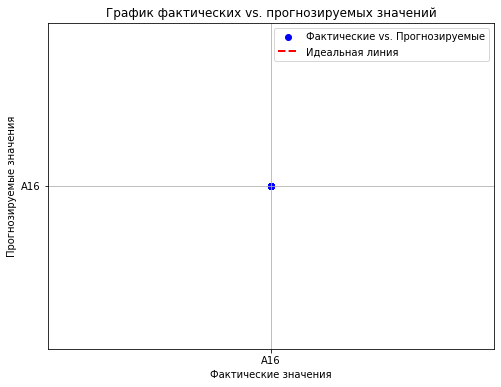

In [377]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Фактические vs. Прогнозируемые')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('График фактических vs. прогнозируемых значений')
plt.legend()
plt.grid(True)

plt.show()

Теперь возьмём модель логистической регрессии:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# создание модели логистической регрессии
model = LogisticRegression()

# обучение модели
model.fit(X_train, y_train)

# получение прогнозов
y_pred = model.predict(X_test)

# оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# печать точности, матрица ошибок и отчёта о классификации
print(f"Точность модели: {accuracy:.2f}")
print("Матрица ошибок (Confusion Matrix):")
print(confusion)
print("Отчет о классификации:")
print(classification_report_str)

Точность модели: 0.83
Матрица ошибок (Confusion Matrix):
[[58 10]
 [14 56]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        68
           1       0.85      0.80      0.82        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



/Users/artemshevchenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/artemshevchenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

